In [1]:
%nvidia-smi

UsageError: Line magic function `%nvidia-smi` not found.


In [2]:
import os
HOME = os.getcwd()
print(HOME)

e:\YOLO-v8-Object-Detection


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **18.01.2023** with version **YOLOv8.0.9**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [3]:
# Pip install method (recommended)

#!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.57  Python-3.12.3 torch-2.3.1+cpu CPU (AMD Ryzen 5 5600H with Radeon Graphics)
Setup complete  (12 CPUs, 13.9 GB RAM, 159.3/476.9 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics 

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [5]:
%cd {HOME}
%yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg'

e:\YOLO-v8-Object-Detection


C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]
UsageError: Line magic function `%yolo` not found.


In [ ]:
# %cd {HOME}
# Image(filename='runs/detect/predict/dog.jpeg', height=600)

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [6]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

100%|██████████| 104k/104k [00:00<00:00, 546kB/s]


image 1/1 e:\YOLO-v8-Object-Detection\dog.jpeg: 640x384 1 person, 1 car, 1 dog, 156.1ms
Speed: 3.0ms preprocess, 156.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)


In [7]:
results[0].boxes.xyxy

tensor([[   0.0000,  314.4715,  625.0756, 1278.1946],
        [  55.1731,  250.0220,  648.1080, 1266.2720],
        [ 633.2291,  719.5391,  701.0539,  786.0336]])

In [8]:
results[0].boxes.conf

tensor([0.7271, 0.2907, 0.2846])

In [9]:
results[0].boxes.cls

tensor([ 0., 16.,  2.])

## Custom Training

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/My Courses/YOLOv8

/content/drive/MyDrive/My Courses/YOLOv8


In [ ]:
%cd /content/drive/MyDrive/My Courses/YOLOv8

%yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=25 imgsz=224 plots=True

/content/drive/MyDrive/My Courses/YOLOv8
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=data.yaml, epochs=25, patience=50, batch=16, imgsz=224, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=F

In [22]:
!dir runs/detect/train

Parameter format not correct - "detect".


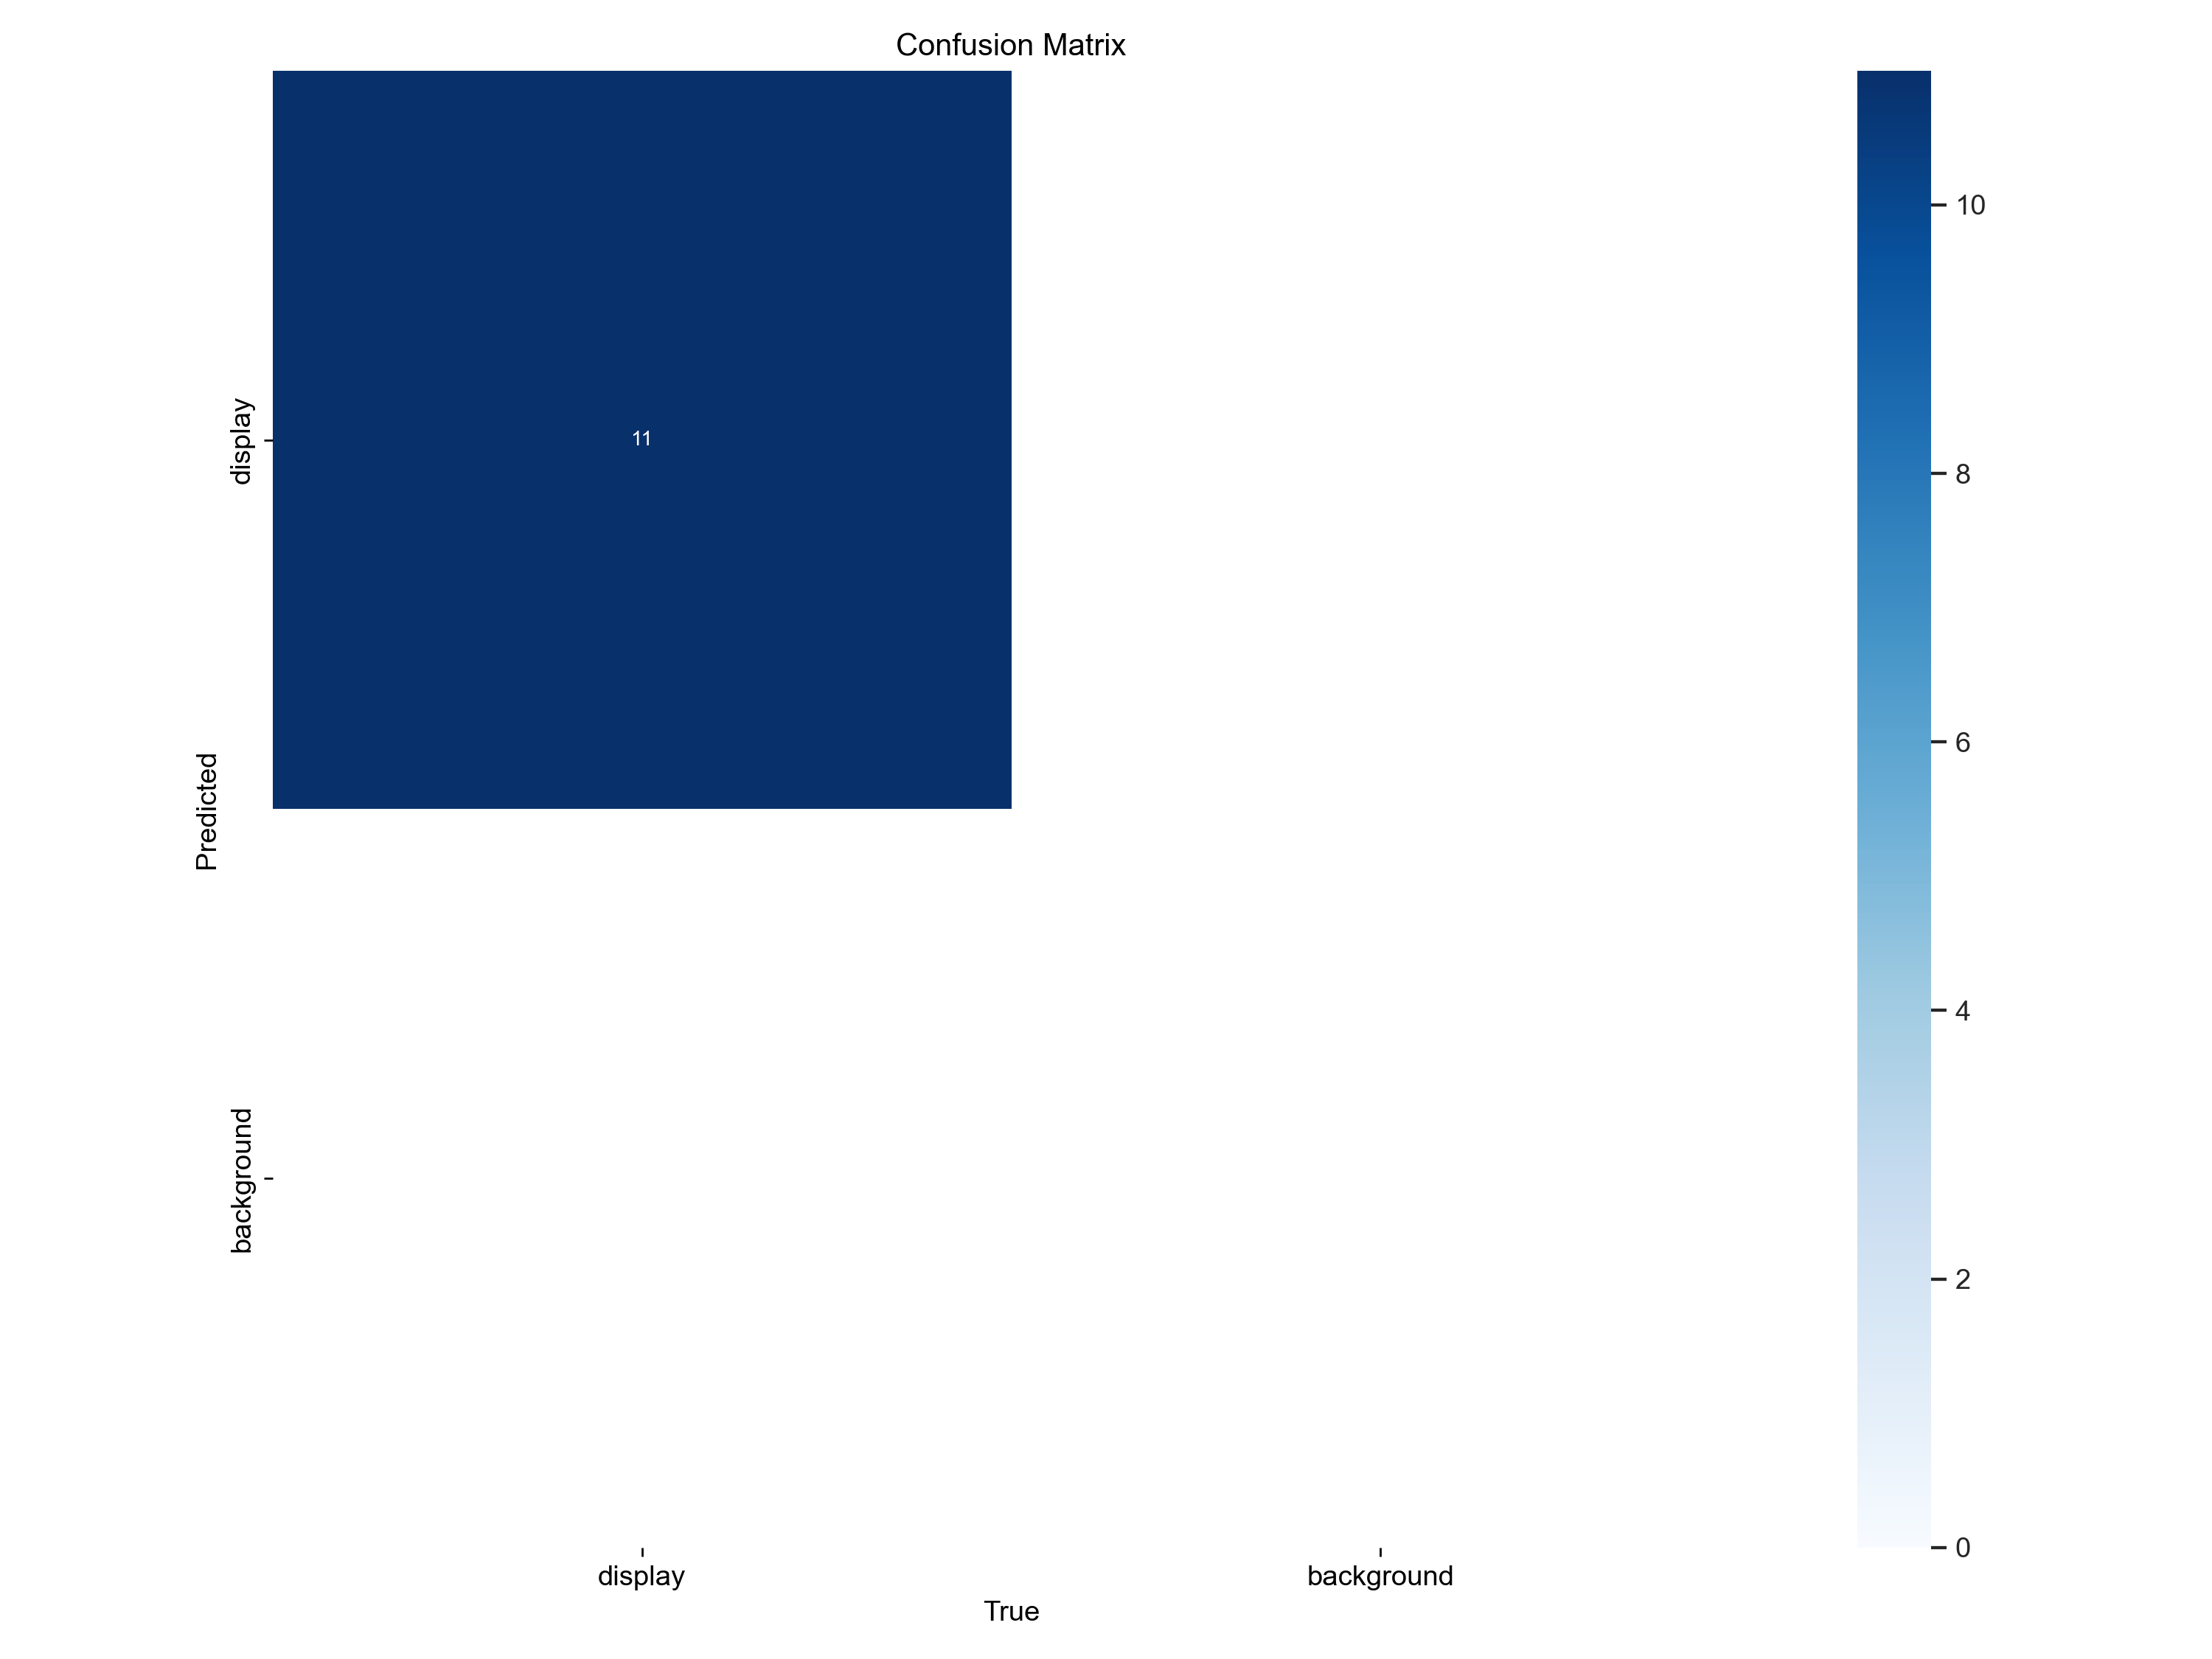

In [23]:
Image(filename='runs/detect/train/confusion_matrix.png', width=600)

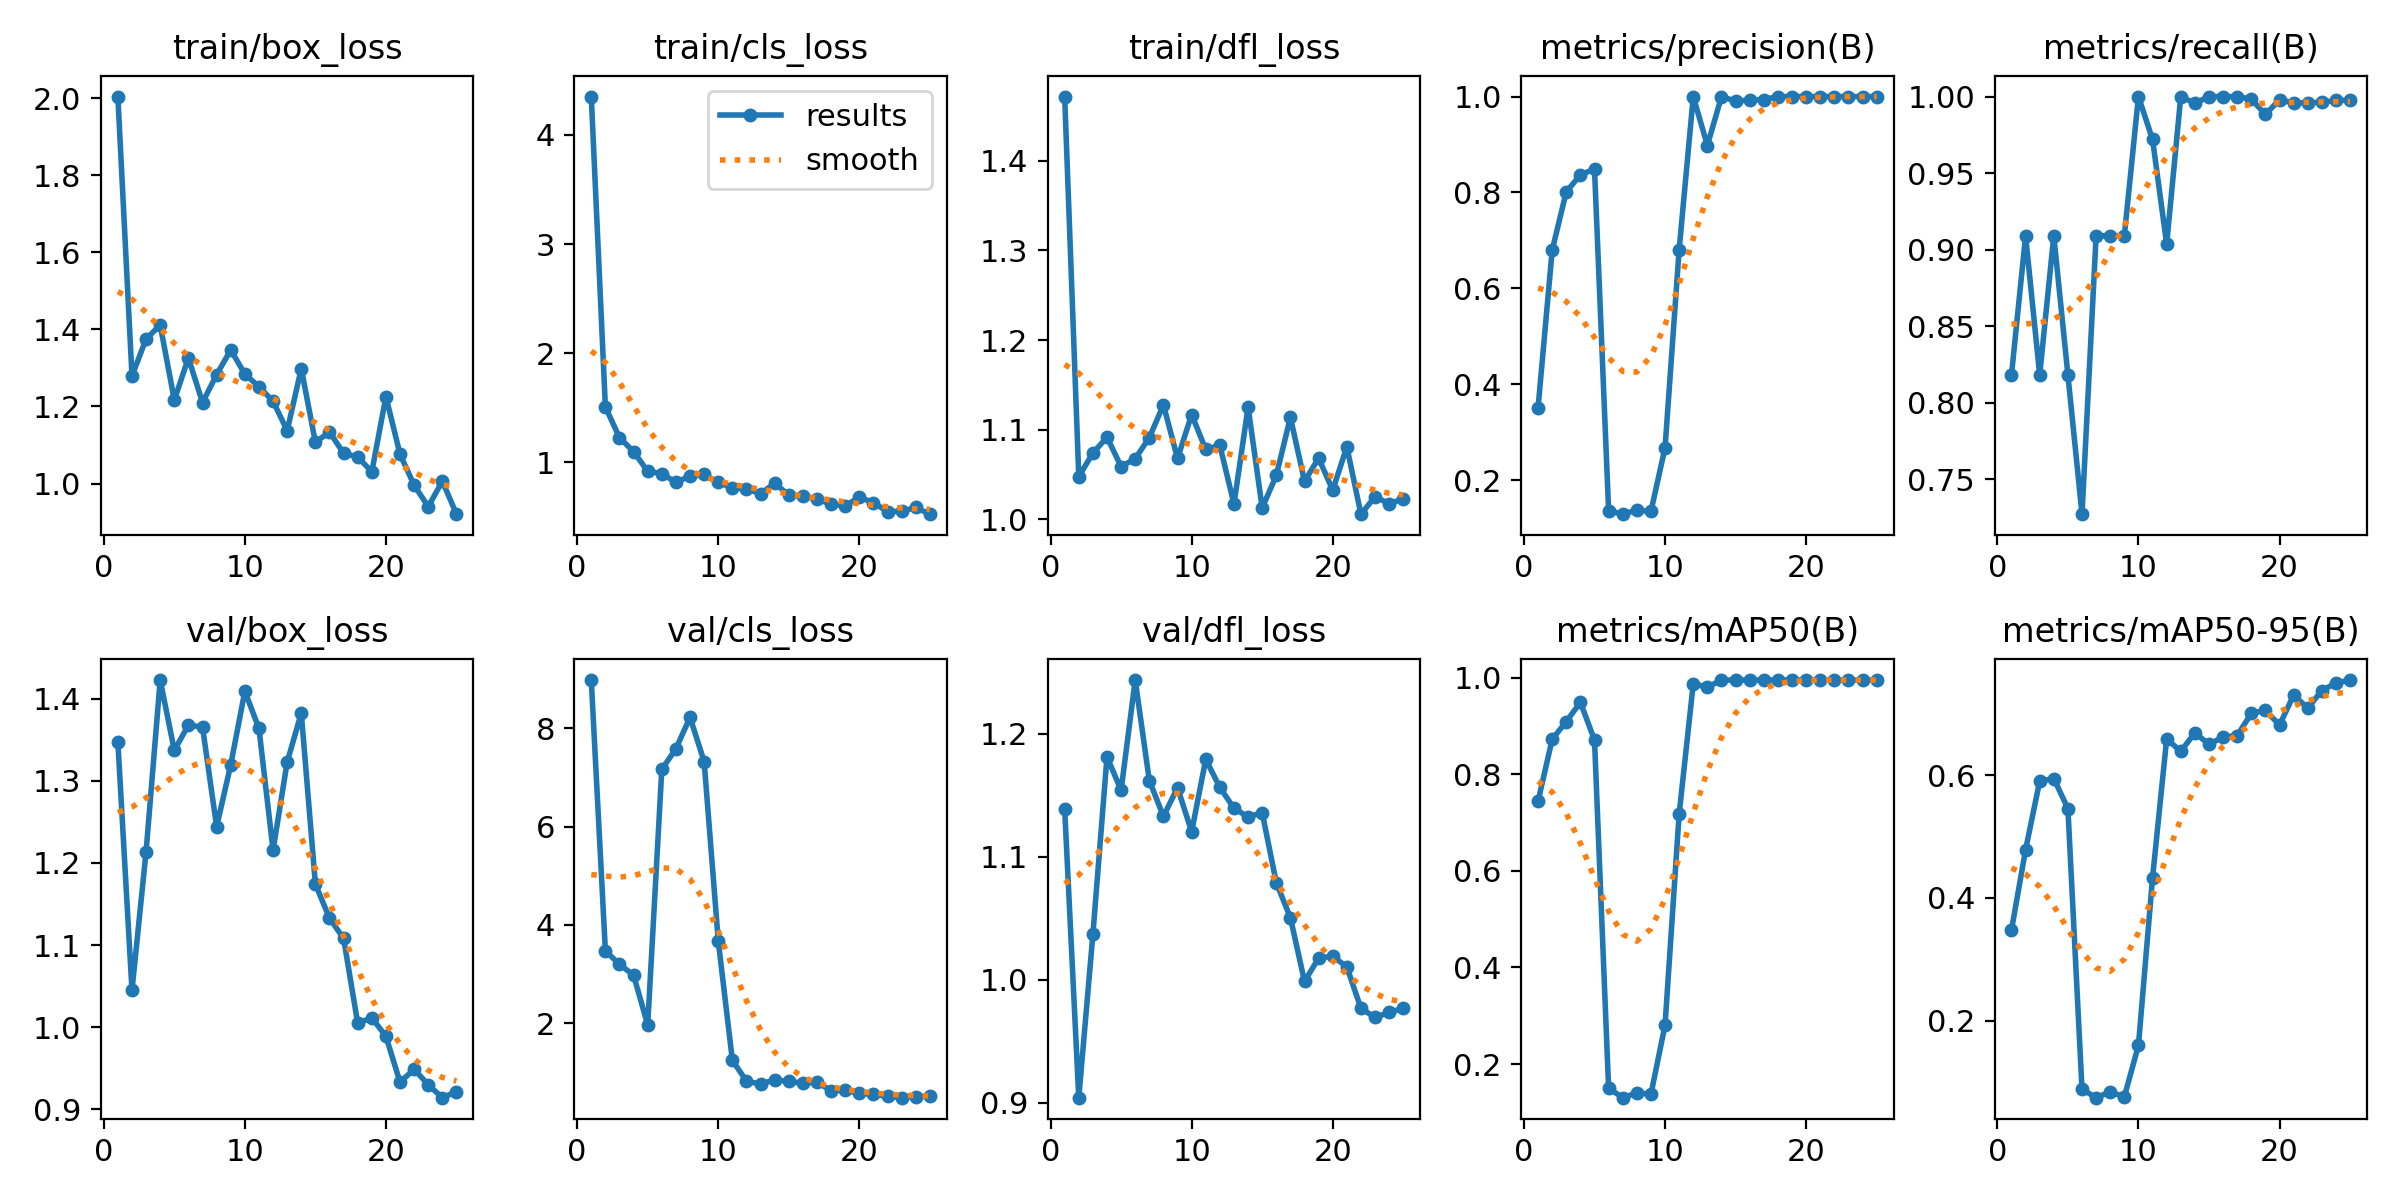

In [17]:
Image(filename='runs/detect/train/results.png', width=600)

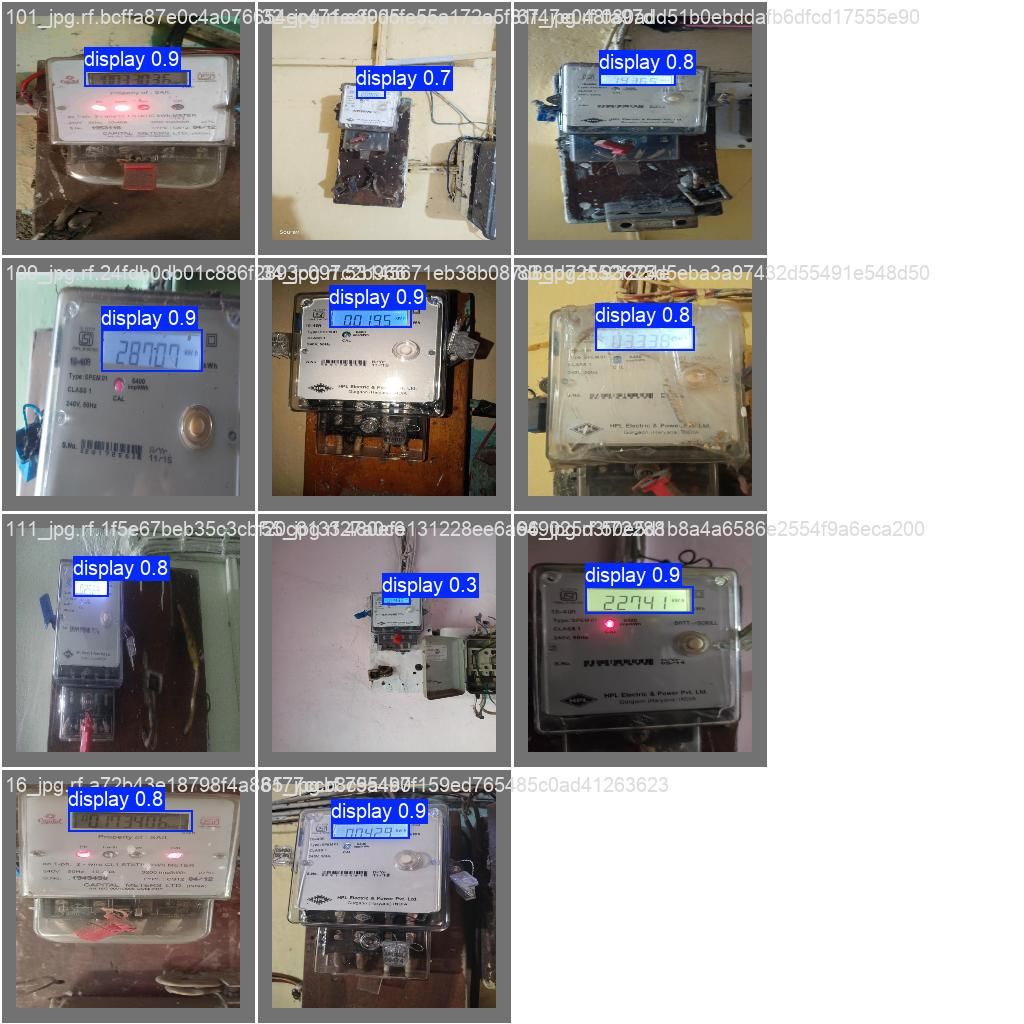

In [18]:
Image(filename='runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [20]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data.yaml

Ultralytics YOLOv8.2.57 🚀 Python-3.12.3 torch-2.3.1+cpu CPU (AMD Ryzen 5 5600H with Radeon Graphics)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
                   all         11         11          1      0.998      0.995      0.755
Speed: 0.5ms preprocess, 78.1ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs\detect\val
💡 Learn more at https://docs.ultralytics.com/modes/val



val: Scanning E:\YOLO-v8-Object-Detection\valid\labels.cache... 11 images, 0 backgrounds, 0 corrupt: 100%|██████████| 11/11 [00:00<?, ?it/s]
val: Scanning E:\YOLO-v8-Object-Detection\valid\labels.cache... 11 images, 0 backgrounds, 0 corrupt: 100%|██████████| 11/11 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]


## Inference with Custom Model

In [26]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=test/images

Ultralytics YOLOv8.2.57 🚀 Python-3.12.3 torch-2.3.1+cpu CPU (AMD Ryzen 5 5600H with Radeon Graphics)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs

image 1/10 e:\YOLO-v8-Object-Detection\test\images\112_jpg.rf.7fda2dfac96d9f703c1e50aa1fbd1164.jpg: 224x224 1 display, 75.6ms
image 2/10 e:\YOLO-v8-Object-Detection\test\images\121_jpg.rf.3ff754f41b9ba1be86e0d7e15f759264.jpg: 224x224 1 display, 67.2ms
image 3/10 e:\YOLO-v8-Object-Detection\test\images\1_jpg.rf.2be1aafbe1665ed3ba525e74e23d4079.jpg: 224x224 1 display, 67.4ms
image 4/10 e:\YOLO-v8-Object-Detection\test\images\50_jpg.rf.b4eb93a4bcbd895565b038d50c6d5790.jpg: 224x224 1 display, 71.5ms
image 5/10 e:\YOLO-v8-Object-Detection\test\images\59_jpg.rf.c8d9e0ce6f2b5892d6e13539729575db.jpg: 224x224 1 display, 66.0ms
image 6/10 e:\YOLO-v8-Object-Detection\test\images\64_jpg.rf.636346ccd4778d80b89bef97ed798e76.jpg: 224x224 1 display, 66.8ms
image 7/10 e:\YOLO-v8-Object-Detection\test\images\6_jpg.rf.9a40

**NOTE:** Let's take a look at few results.

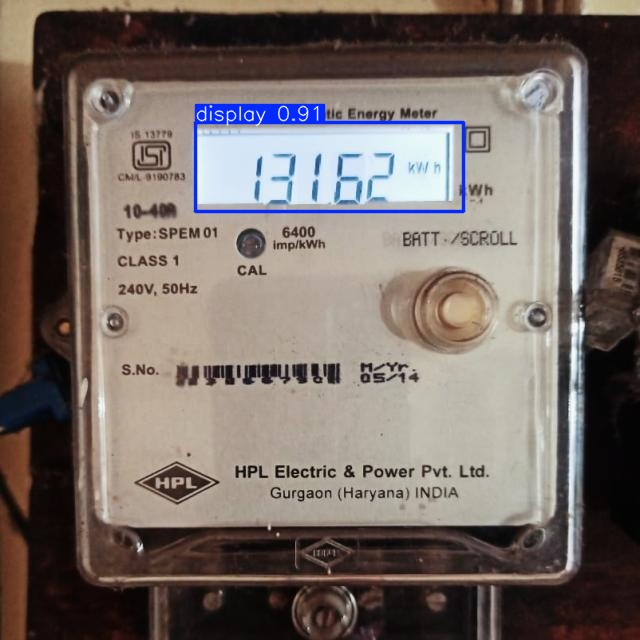

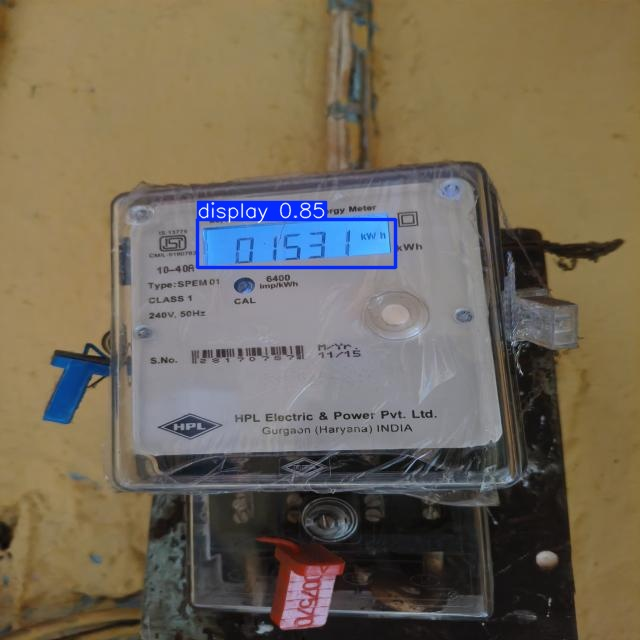

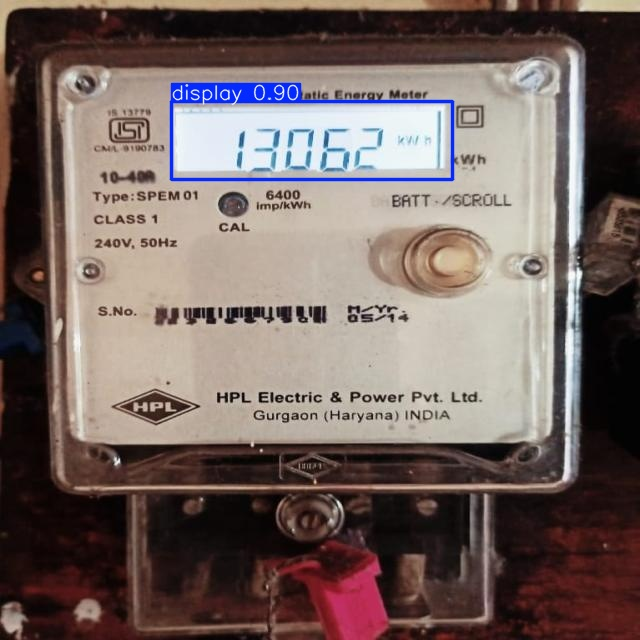

In [28]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")